In [65]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
path_to_data = "../data/train_images.npy"
path_to_labels = "../data/train_labels.csv"
path_to_test = "../data/test_images.npy"

In [88]:
# data = np.load(path_to_data, encoding = 'bytes')
labels_df = pd.read_csv(path_to_labels)
labels_df.Category = pd.Categorical(labels_df.Category)
labels = labels_df.Category.cat.codes.values

In [80]:
def plot_images(list_of_images, max_col = 4):
    n = len(list_of_images)
    if n == 1:
        plt.imshow(list_of_images[0], cmap = 'gray_r'); plt.axis('off'); plt.show()
    else:
        # get number of columns and rows required
        r, c = 1, n
        if n > max_col:
            c = max_col
            r = int(math.ceil(n/max_col))
    
        fig = plt.figure(figsize=(17, max_col * r))
        for i, (img,name) in enumerate(list_of_images):
            ax = fig.add_subplot(r, c, (i+1))
            ax.set_title(str(name))
            ax.axis('off')
            ax.imshow(img, cmap = 'gray_r')

In [60]:
first_img = data[:, 1][1].reshape(100,100)

In [61]:
first_img.shape

(100, 100)

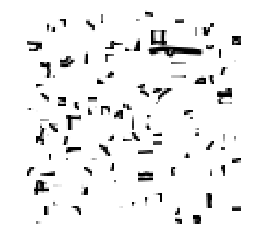

In [62]:
plot_images([first_img])

In [ ]:
def fine_tune_linear_SVM(x_tr, y_tr, x_val, y_val,
                         number_of_model, cs):
    all_c = random.choices(list(np.linspace(cs[0], cs[1],
                                            number_of_model*100, endpoint=True)), 
                           k=number_of_model)

    f1_scores = []
    model = svm.LinearSVC(max_i)
    model.fit(x_tr, y_tr)
    preds = model.predict(x_val)
    cur_f1 = metrics.f1_score(y_val, preds, average = 'micro')

    return best_model

In [ ]:
svm = 